William Saunders  
Notebook #1

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('retina')

# Notebook 1: Why is Machine Learning difficult?

## Overview 

In this notebook, we will get our hands dirty trying to gain intuition about why machine learning is difficult. 

Our task is going to be a simple one, fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression. Here we will do a series of exercises that are intended to give the reader intuition about the major challenges that any machine learning algorithm faces.

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, the "noise" in the data, and our knowledge about relevant features. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a family of functions $g_\alpha(x;\theta_\alpha)$ that depend on some parameters $\theta_\alpha$. These functions respresent the **model class** that we are using to try to model the data and make predictions. The $g_\alpha(x;\theta_\alpha)$ encode the class of **features** we are using to represent the data.

To learn the parameters $\boldsymbol{\theta}$, we will train our models on a **training data set** and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.  


For the remainder of the notebook, we will focus on polynomial regression. Our task is to model the data with polynomials and make predictions about the new data that we have not seen.
We will consider two qualitatively distinct situations: 
<ul>
<li> In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
<li>In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial but $g_\alpha(x;\theta_\alpha)$ are polynomials of order 1 or 3.
</ul>

In the exercises and discussion we consider 3 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.
</ul>

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
We will return to this in later notebooks. For now, we will try to get a qualitative picture by examining plots on test and training data.

## Fitting vs. predicting when the data is in the model class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials). 


Run the code for the following cases:
<ul> 
<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?
<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
</ul>


## Fitting vs. predicting when the data is not in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0,1$. Record your observations.
<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.


# Training the models:

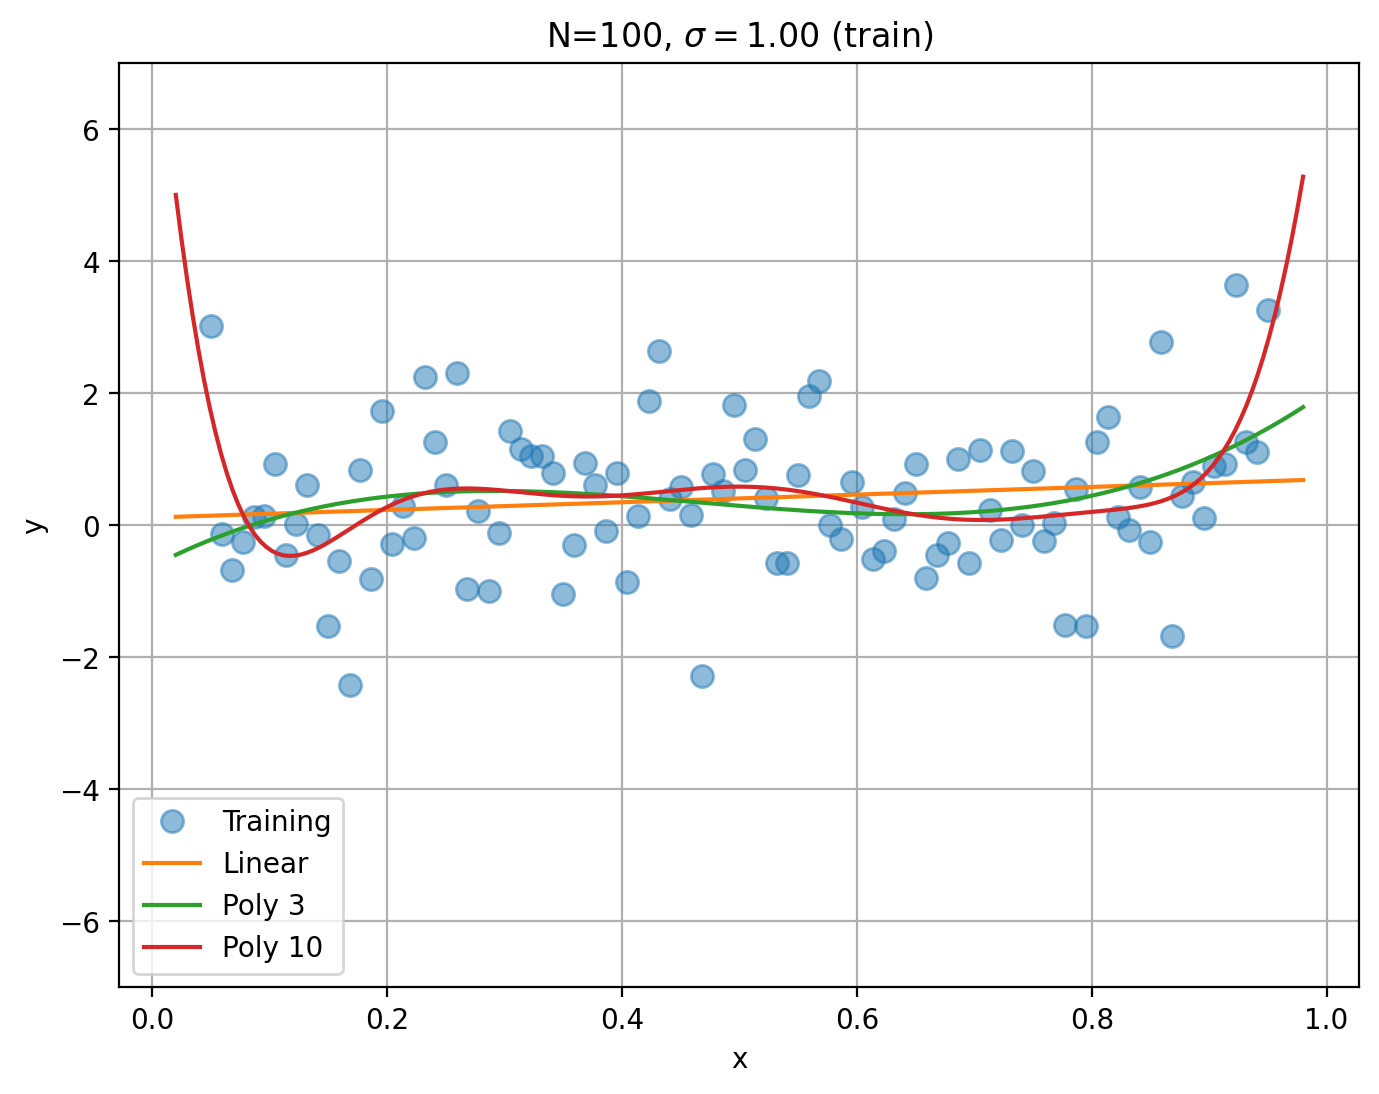

In [2]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(8, 6))

# The Training Data
N_train=100
sigma_train=1;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
#y=2*x+s

# Tenth Order
y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()


# Testing the fitted models

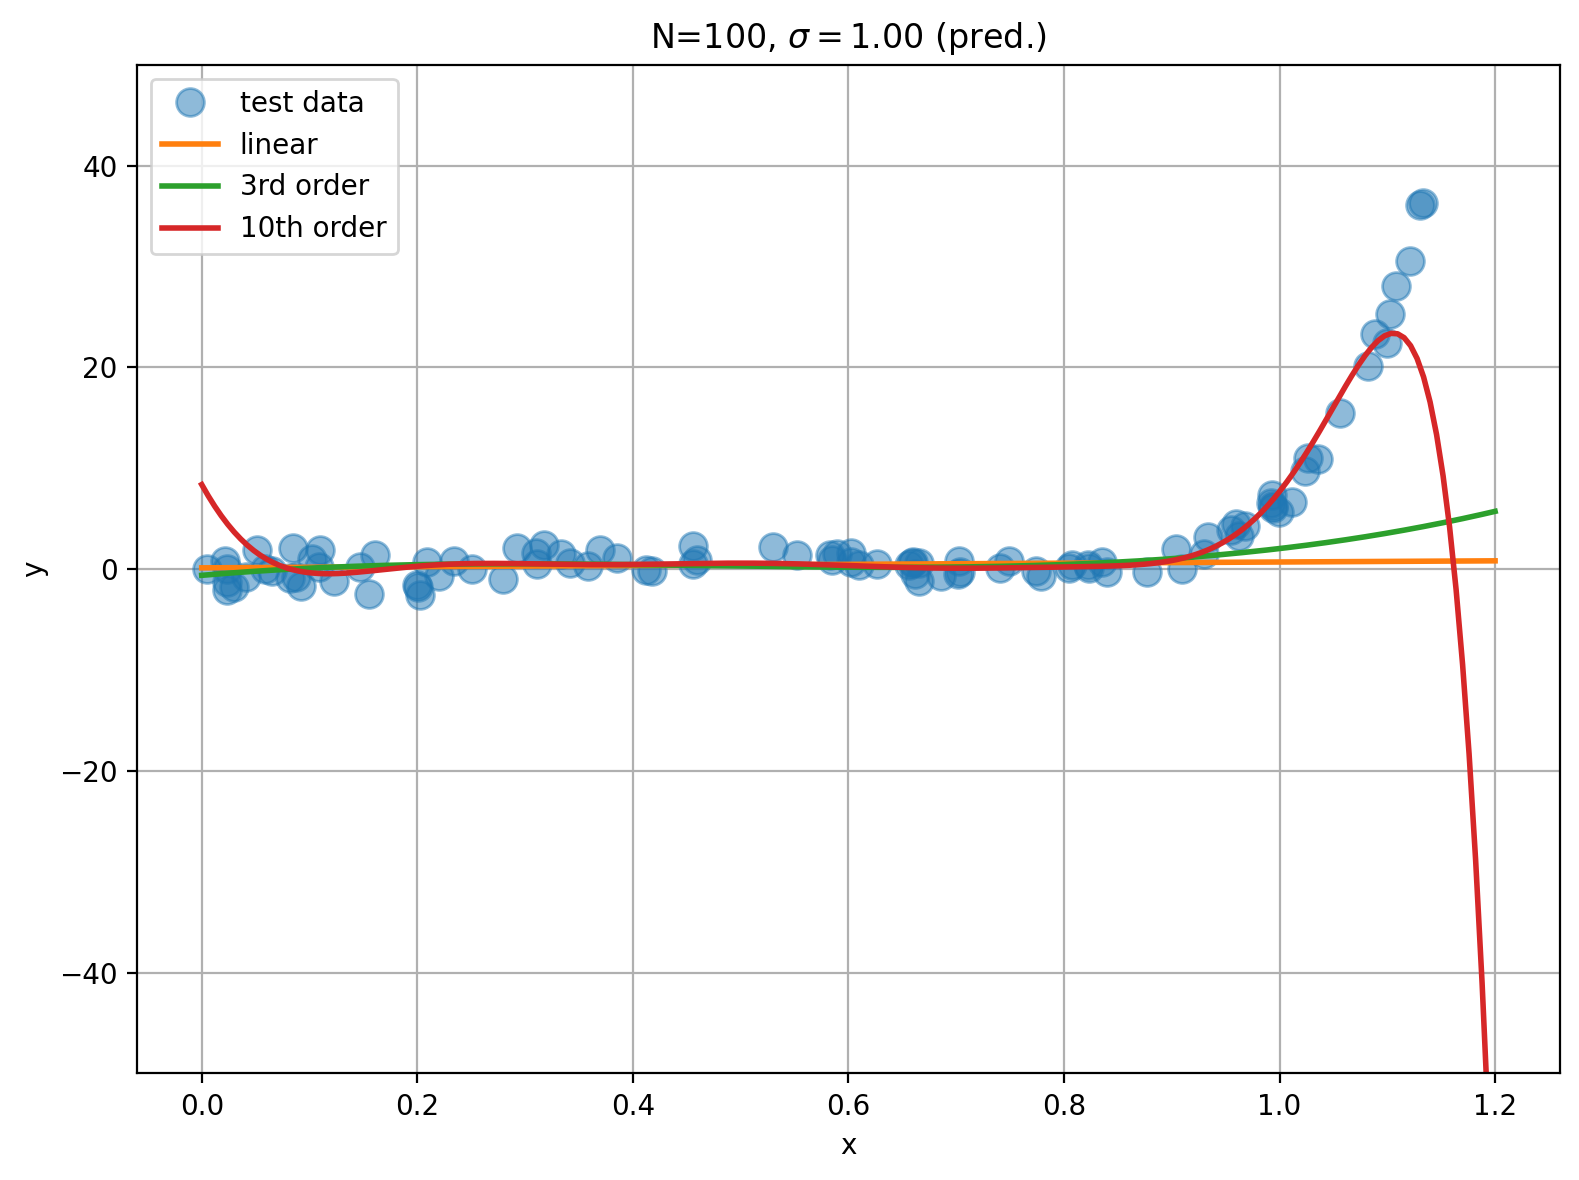

In [3]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=100
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
#y_test=2*x_test+s_test
# Tenth order
y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
#plt.ylim((-6,12))
plt.ylim(-50, 50)

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

- For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
    - For the case of $N_{train}$ = 100, $\sigma$ = 0, all three models converge on a linear fit and all three fit perfectly. Since the models are contained within the generating function, they are perfectly predictive as well.  This is true no matter the size of $N_{train}$, because the models are as expressive or more expressive than the generating function. 
 

- Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
    - The model with the least error on the training set does not generally predict well because it's so specific to the training set and the specific noise of the training data that it loses the ability to generalize. For the noise-free case, however, the model with the least error on the training set likely will make the best predictions. In this case, because we know the models contains the generating function for $\sigma$ = 0, we know they'll be perfectly predictive. However, you can imagine a scenario in which the model has sufficient expressivity and the training set is small enough that the model can have 0 error on the training set but be poor at predicting. This is because the generating funciton is not contained within the model but the model has parameters equal to the number of data points. 

- Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
    - All the points both inside and outside the range are prdicted exactly by all three models, since the models have converged on the same linear functions and the generating function was linear as well. This is because there is no noise. I predict this behavior will not continue when noise is added.  

- Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
    - In this case, the 10th order polynomial fits to the training data exactly, because the number of degrees of freedom (11) is more than the number of data points (10). This may look good but it's terribly bad at being predictive either within or outside of the range. It's **significantly** worse at predicting outside the range. It is so highly trained to the noisy data that it fails to be generalizable. This is both because the training set is small and the model is highly expressive. The linear model is the worst fit of the three but is the best at predicting because it is the least expressive, making it better at generalizing, especially when there is little training data.   

- Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?
    - The 10th order model is still overfitting to the training data but now it cannot fit perfectly because the training set is larger. The 10th order is converging toward a linear model in the middle of the training range. In predicting, the 10th order model is still **really** bad. Despite having more data to work with, it still is too expressive and is highly non-linear at the edge of the training range. The linear model is certainly the best at predicting, with the third-order falling in between. The ability of each model to predict is about the same as the previous example, but now the more expressive models are much better at fitting. That is somewhat dangerous because it can deceive you into thinking that the model is well trained since it fits better but it is just as bad at being predictive, which is the goal. 

- Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
    - Expressivity of a model is not necessarily a good thing. In fact, it is worse in all these examples so far. A less-expressive model, especially when the sample size is small, as is the case here, is much better at preciting. 
    - The ability of a model to predict is almost uncorrelated to its abiilty to fit to training data. As I mentioned, above, this is dangerous. Since the goal is predcitive power, being better at fitting might be a red herring in this example. 

- Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0,1$. Record your observations.
    - For the case of $N_{train}$ = 10, $\sigma$ = 0, the 10th order polynomial fits perfectly beacuse it has more degrees of freedom (11) than the number of data points (10). In addition, it's perfectly predictive. This makes sense because you're using the generating function as the model as welll, as the expressivity of the model matches the complexity of the generating function exactly. The third order model is OK at both fitting and predicting and the lienar model isn't good at either. 
    - For the case of $N_{train}$ = 10, $\sigma$ = 1, the 10th order polynomial again fits perfectly because it has more degrees of freedom than the number of data points. It doesn't matter that there is noise, because all that matters is the expressivity of the model exceeds the number of data points. You can generating 10 data points in ANY way (as long as they have unique x-values) and a 10th order polynomial could always fit perfectly to it. The key differnce here compared to above is that it is now **wildly** bad at predicting outside the range. It's pretty bad within the range but really just horrific outside. The third order polynomial fits worse but predicts better and **significantly** better outside the range. The linear model fits the worst and predicts best within the range but not so great outside the range. 
    - For the case of $N_{train}$ = 100, $\sigma$ = 0, the 10th order polynomial fits perfectly and predicts perfectly, both within and outside the range. This makes sense because the generating function is also a 10th order polynomial and there is no noise. The third order polynomial is worse at both and the linear model is yet worse at both.  
    - For the case of $N_{train}$ = 100, $\sigma$ = 1, the 10th order polynomial fits fairly well. It is much better at predicting within the range than outside the range because the larger data set and noise profile forces it not to become too highly trained to the noisy data. When I run it a few times, it will sometimes be good at predicting outside the range but when I extend the y-axis, I can see that it gets worse and worse the farther outside the range you get. The third order and linear both fit well but the third order now predicts slightly worse outside the range than it did on the $N_{train}$ = 10 case.  The linar model is bad at predicting outside the range. 

- Do better fits lead to better predictions?
    - It depends on the complexity of the model. For really simple models, a better fit will lead to a better prediction. As complexity increases, at first better fits will lead to better predictions but at a certain point, the model begins to become too complex and starts to overfit. At that point, better fitting actually leads to worse predictions. 

- What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
    - As $N_{\mathrm{train}}$ increases, holding $\sigma$ constant, more expressive models perform much better at predicting because the effect of larger sample size is to decrease the importance of individual errors. At a certain p
    - As $\sigma$ increases, holding $N_{\mathrm{train}}$ constant, more expressive models perform worse at predicting because they are much more sensitive to individual errors. 
    - Overall, I can't seem to find a relationship between the true generating model and the model class used to estimate it. There are cases where the more expressive model is worse at predicting, even when it was the generating model and other times when it is better. 

- Summarize what you think you learned about the relationship of knowing the true model class and predictive power.
    - It's probably rare to know the true generating model. 
    - Due to the bias-variance tradeoff, there is an optimal model expressivity for a given dataset. If you know the generating model, you can choose a model from the same family, which decreases the bias without changing the variance, therefore being an improvement over the other models with the same number of parameters. 
    - Even if you know the generating model, it's really hard to be predictive under any realistic scenario. 